In [1]:
## PLCA
# import numpy as np
# F,T = magnitude.shape
# Z = 5
# Vft = magnitude
# import random
# random.seed(10)
# Pt_z = np.random.uniform(low=0.1, high=0.9, size=(T,Z))
# Pt_zbyf = np.random.uniform(low=0.1, high=0.9, size=(T,F,Z))
# P_fbyz = np.random.uniform(low=0.1, high=0.9, size=(Z,F))

In [2]:
## Normalization rules
# def normalize_Pt_z(T,Pt_z) :
#     for t in range(T): 
#         Pt_z[t,:] = Pt_z[t,:]/sum(Pt_z[t,:])

# def normalize_P_fbyz(Z,P_fbyz) :
#     for z in range(Z): 
#         P_fbyz[z,:] = P_fbyz[z,:]/sum(P_fbyz[z,:])

# def normalize_Pt_zbyf(T,F,Pt_zbyf) :
#     for t in range(T):
#         for f in range(F):
#             Pt_zbyf[t,f,:] = Pt_zbyf[t,f,:]/sum(Pt_zbyf[t,f,:])

In [3]:
## Normalize
# normalize_Pt_z(T,Pt_z)
# normalize_P_fbyz(Z,P_fbyz)
# normalize_Pt_zbyf(T,F,Pt_zbyf)
# P_fbyz

In [4]:
## Updation rules
# def update_Pt_zbyf(T,Z,F,Pt_zbyf,Pt_z,P_fbyz) :
#     for t in range(T):
#         for f in range(F):
#             for z in range(Z):
#                 Pt_zbyf[t,f,z] = Pt_z[t,z]*P_fbyz[z,f]/np.dot(Pt_z[t,:],P_fbyz[:,f])

# def update_Pt_z(T,Z,Pt_z,Pt_zbyf,Vft) :
#     for t in range(T):
#         for z in range(Z):
#             denominator=0
#             for z1 in range(Z):
#                 if z1==z : numerator = np.dot(Vft[:,t], Pt_zbyf[t,:,z])
#                 denominator += np.dot(Vft[:,t], Pt_zbyf[t,:,z1])
#             Pt_z[t,z] = numerator/denominator

# def update_P_fbyz(Z,F,Pt_z,Pt_zbyf,Vft) :
#     for z in range(Z):
#         for f in range(F):
#             denominator=0
#             for f1 in range(F):
#                 if f1==f : numerator =  np.dot(Vft[f,:], Pt_zbyf[:,f,z])
#                 denominator += np.dot(Vft[f1,:], Pt_zbyf[:,f1,z])
#             P_fbyz[z,f] = numerator/denominator

# def update(max_iterations,T,Z,F,Vft,Pt_zbyf,Pt_z,P_fbyz) :
#     for iteration in range(max_iterations) :
#         update_Pt_zbyf(T,Z,F,Pt_zbyf,Pt_z,P_fbyz)
#         update_Pt_z(T,Z,Pt_z,Pt_zbyf,Vft)
#         update_P_fbyz(Z,F,Pt_z,Pt_zbyf,Vft)    


In [5]:
## Update
# update(1,T,Z,F,Vft,Pt_zbyf,Pt_z,P_fbyz)
# P_fbyz

/anaconda3/lib/python3.6/site-packages/musdb/__init__.py:86: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.setup = yaml.load(f)


(1853, 1292)


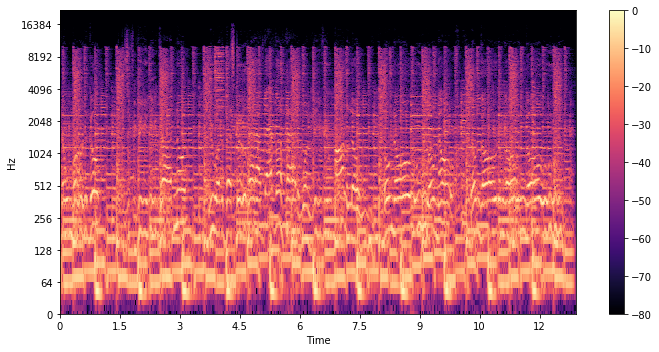

In [36]:
# # Using STEMS format

# #Entire Song
# import os
# import librosa
# import IPython
# import musdb
# root_directory='/Users/apple/Downloads/mus_stems'
# mus = musdb.DB(root_directory)
# tracks = mus.load_mus_tracks(subsets=['train'])
# sample_rate = tracks[0].rate
# #IPython.display.Audio(data = tracks[0].audio[:,0], rate = tracks[0].rate)

# # Single instrument
# song_index = 0
# import musdb
# mus = musdb.DB(root_dir='/Users/apple/Downloads/mus_stems')
# tracks = mus.load_mus_tracks(subsets=['train'])
# vocals = tracks[song_index].targets['vocals'].audio
# IPython.display.Audio(data = vocals[:,0], rate = tracks[song_index].rate)

# # STFT
# window_size = int(0.084*sample_rate)
# hop_size = int(0.01*sample_rate)
# Stft = librosa.stft(tracks[song_index].audio[:,0], n_fft = window_size, hop_length=hop_size)
# Vft, phase = librosa.magphase(Stft)
# print(Vft.shape)
# # Plot
# import numpy as np
# import matplotlib.pyplot as plt
# import librosa.display
# plt.figure(figsize=(10,5))
# librosa.display.specshow(librosa.amplitude_to_db(Vft,ref=np.max), 
#                          x_axis='time', y_axis='log', sr=sample_rate, hop_length=hop_size)
# plt.colorbar()
# plt.tight_layout()

In [45]:
## Create directory path
import os
dataset_path = '/Users/apple/Downloads/Bach10/'
song_paths = []
for song_name in os.listdir(dataset_path) :
    if (song_name != '.DS_Store') : song_paths.append(dataset_path + song_name + '/')
song_paths = sorted(song_paths)
length = len(song_paths)
#print(song_paths)

## Create directories
mats_and_wavs = [[] for k in range(len(song_paths))]
length = len(dataset_path)
for i in range(len(song_paths)):
    mats_and_wavs[i].append(song_paths[i]+song_paths[i][length:-1]+'-GTF0s.mat') 
    mats_and_wavs[i].append(song_paths[i]+song_paths[i][length:-1]+'.wav')
print(mats_and_wavs[7][1])

## Read wavfile for the first song
import librosa
import IPython
song, sample_rate = librosa.load(mats_and_wavs[7][1])
IPython.display.Audio(data = song, rate = sample_rate)
#sample_rate = 22050

/Users/apple/Downloads/Bach10/08-FuerDeinenThron/08-FuerDeinenThron.wav


(706, 3332)


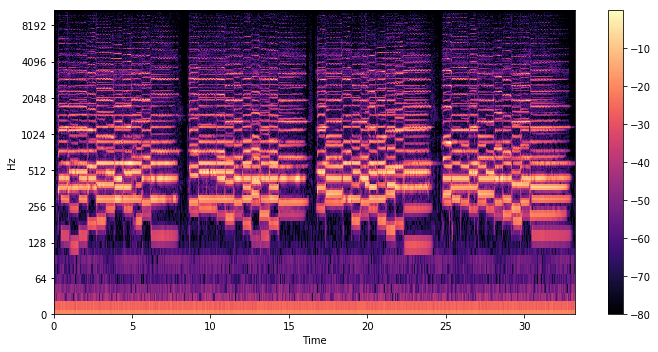

In [47]:
## Compute STFT
window_size = int(0.064*sample_rate)
hop_size = int(0.010*sample_rate)
Stft = librosa.stft(song, n_fft = window_size, hop_length=hop_size)
Vft, phase = librosa.magphase(Stft)
print(Vft.shape)
# Plot
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,5))
librosa.display.specshow(librosa.amplitude_to_db(Vft,ref=np.max), x_axis='time', y_axis='log', 
                        sr=sample_rate, hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

In [5]:
x = librosa.istft(Vft*phase, win_length = window_size, hop_length=hop_size)
IPython.display.Audio(data = x, rate = sample_rate)

In [6]:
## Clip STFT
import librosa
array = librosa.fft_frequencies(sr=sample_rate, n_fft=window_size)
print(array[172])

2047.8401727861772


In [7]:
## Define filters and basic block
import math
sqrt = math.sqrt
pi = math.pi
exp = math.exp

def gaussian(x,mu,sigma=3/8):
    if x<0 : return 0
    return (1/sqrt(2*pi*sigma))*exp(-(((x-mu)**2)/sigma**2))

## Define a single trinagular filter, exponentially distributed
def triangle_filter(f,a,fr=50,r=2):
    # amplitude of the filter is 1
    if(a==0) : 
        if(f<0) : return 0
        else : return max(0,1-f/fr)
    elif(a==1) :
        if(f<fr) : return max(0,f/fr)
        else : return max(0,(2*fr-f)/fr)
    else :
        f1 = 2**(a-2)*fr
        f2 = 2**(a-1)*fr
        f3 = 2**a*fr
        if(f<f2) : return max(0,(f-f1)/(f2-f1))
        else : return max(0,(f3-f)/(f3-f2))

## Define K multiples of gaussian filter at the multiples of f0
def multiple_gaussian(K,f,f0,sigma=0.5) :
    if f<0 : return 0
    y=0
    for k in range(K+1): y+=gaussian(f,k*f0,sigma)
    return y

## Define basic block
def basic_block(K,f,a,f0,fr=50,r=2,sigma=0.5) :
    return multiple_gaussian(K,f,f0,sigma)*triangle_filter(f,a,fr,r)

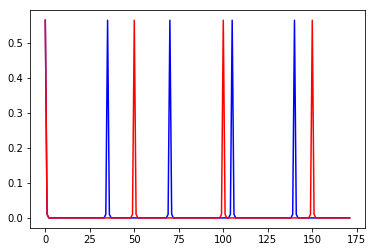

In [8]:
F = 172
array1 = []
array2 = []
for f in range(F):
    array1.append(multiple_gaussian(10,f,35,0.5))
    array2.append(multiple_gaussian(10,f,50,0.5))
    
import matplotlib.pyplot as plt
plt.plot(array1, 'b', array2, 'r')
plt.show()
#plt.imsave('./8', np.array(array))

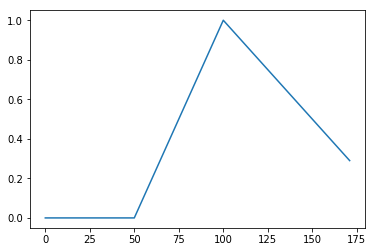

In [9]:
array = []
for f in range(F):
    array.append(triangle_filter(f,2,50,2))
plt.plot(array)
plt.show()    

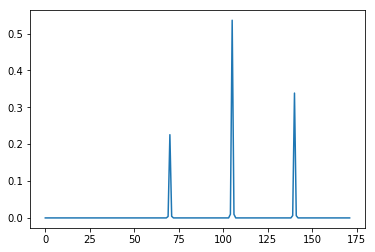

In [10]:
array = []
for f in range(F):
    array.append(basic_block(10,f,2,35,50,2,0.5))
plt.plot(array)
plt.show() 

In [11]:
import numpy as np
list_of_instruments = ['Violin', 'Clarinet', 'Saxophone','Bassoon']

N = len(song_paths)
F = 172
K = 10
A = 7
S = len(list_of_instruments)
P = len(list_of_instruments)
Z = 3
# Hyperparameters
sigma=0.5
fr = 50
r = 2


T = 10000
from scipy.io import loadmat
for i in range(10):
    matrix = np.array(loadmat(mats_and_wavs[i][0])['GTF0s']).astype('int')
    T = min(T, matrix[0].shape[0])
print(T)

## Create f0_from_pt
from scipy.io import loadmat
def create_f0_from_pt(f0_from_pt):
    global N,T
    for song_index in range(N):
        matrix = np.array(loadmat(mats_and_wavs[song_index][0])['GTF0s']).astype('int')
        print(matrix.shape)
        for t in range(T):
            index=0
            for p in range(P):
                if matrix[p][t]!=0 and matrix[p][t]<F:
                    f0_from_pt[song_index][t][index]=matrix[p][t]
                    index+=1

f0_from_pt = np.zeros((N,T,P))
#create_f0_from_pt(f0_from_pt)

## Update Pt_fbypa
def update_Pt_fbypa(song_index, Pt_fbypa):
    global T,P,A,F,K
    # from p to f0
    for t in range(T):
        for p in range(P):
            #print('Updating')
            for a in range(A):
                array = np.array([0.0 for k in range(F)])
                total_basics=0
                for f in range(F):
                    f0=f0_from_pt[song_index][t][p]
                    basic = basic_block(K,f,a,f0,fr,r,sigma)
                    total_basics += basic
                    array[f] = basic
                    #if basic!=0 : print(array[f])
                if total_basics!=0 : array = array/total_basics
                else : array = np.array([0.0 for k in range(F)])
                Pt_fbypa[t,p,a,:]=array
    print('Updated')

# Pt_fbypa = np.random.uniform(low=0.1, high=0.9, size=(T,P,A,F))
# update_Pt_fbypa(0,Pt_fbypa)

# Pt_p = np.random.uniform(low=0.1, high=0.9, size=(T,P)) 
# Pt_sbyp = np.random.uniform(low=0.1, high=0.9, size=(T,P,S))
# Pt_zbyps = np.random.uniform(low=0.1, high=0.9, size=(T,P,S,Z))
# P_abysz = np.random.uniform(low=0.1, high=0.9, size=(S,Z,A))

2519


In [13]:
## Normalization rules
def normalize_Pt_p(T,Pt_p) :
    for t in range(T): 
        Pt_p[t,:] = Pt_p[t,:]/sum(Pt_p[t,:])
        
def normalize_Pt_sbyp(T,P,Pt_sbyp) :
    for t in range(T):
        for p in range(P):
            Pt_sbyp[t,p,:] = Pt_sbyp[t,p,:]/sum(Pt_sbyp[t,p,:])
                  
def normalize_Pt_zbyps(T,P,S,Pt_zbyps) :
    for t in range(T):
        for p in range(P):
            for s in range(S):
                Pt_zbyps[t,p,s,:] = Pt_zbyps[t,p,s,:]/sum(Pt_zbyps[t,p,s,:])

def normalize_P_abysz(S,Z,P_abysz) :
    for s in range(S): 
        for z in range(Z):
            P_abysz[s,z,:] = P_abysz[s,z,:]/sum(P_abysz[s,z,:])

In [14]:
## Normalize
# normalize_Pt_p(T,Pt_p)
# normalize_Pt_sbyp(T,P,Pt_sbyp)
# normalize_Pt_zbyps(T,P,S,Pt_zbyps)
# normalize_P_abysz(S,Z,P_abysz)

In [15]:
## Update Pt_f
Pt_f = np.random.uniform(low=0.1, high=0.9, size=(T,F))
def update_Pt_f(Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz) :
    global T,F
    for t in range(T):
        #print('Updating')
        for f in range(F):
            matrix=Pt_p[t,:]*Pt_sbyp[t,:,:]
            matrix=np.reshape(matrix, list(matrix.shape) + [1])
            matrix=matrix*Pt_zbyps[t,:,:,:]
            matrix*=np.tensordot(Pt_fbypa[t,:,:,f],P_abysz[:,:,:],axes=(1,2))
            Pt_f[t,f]=matrix.sum()
    print('Updated')
        
#update_Pt_f(Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz)

In [16]:
## Update rules

def three_dimensional_product(M1,M2):
    A,B,C = M1.shape
    B,C,D = M2.shape
    M3 = np.zeros((A,B,C,D))
    for a in range(A):
        for d in range(D):
            M3[a,:,:,d] = M1[a,:,:]*M2[:,:,d]
    return M3

def four_dimensional_product(M1,M2):
    A,B,C = M1.shape
    B,C,D,E = M2.shape
    M3 = np.zeros((A,B,C,D,E))
    for a in range(A):
        for d in range(D):
            for e in range(E):
                M3[a,:,:,d,e] = M1[a,:,:]*M2[:,:,d,e]
    return M3

Pt_pszabyf = np.random.uniform(low=0.1, high=0.9, size=(T,F,P,S,Z,A))
def update_Pt_pszabyf(Pt_pszabyf,Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz):
    global T,F,P,S,Z,A
    for t in range(T):
        print('Updating')
        x = Pt_fbypa[t,:,:,:]/Pt_f[t,:]         #x.shape = (4, 7, 172
        x[np.isnan(x)]=0.0
        x = np.swapaxes(x,0,2)                  #x.shape = (172, 7, 4)
        x = np.swapaxes(x,1,2)                  #x.shape = (172, 7, 4)
        # x
        y=np.reshape(Pt_p[t,:], list(Pt_p[t,:].shape)+[1])            #y.shape = (4,1)
        y=y*np.ones((1,S))                                            #y.shape = (4,5)
        y=y*Pt_sbyp[t,:,:]                                            #y.shape = (4,5)
        y=np.reshape(y, list(y.shape) + [1])                          #y.shape = (4,5,1)
        y=y*Pt_zbyps[t,:,:,:]                                         #y.shape = (4,5,3)
        y.shape
        #y
        z = three_dimensional_product(y,P_abysz)                      #z.shape = (4,5,3,7)
        z = np.swapaxes(z,1,3)                                        #z.shape = (4,7,3,5)
        #z
        w = four_dimensional_product(x,z)                             #w.shape = (172,4,7,3,5)
        w = np.swapaxes(w,2,4)                                        #w.shape = (172,4,5,3,7)
        Pt_pszabyf[t,:,:,:,:,:]=w
#         for f in range(F):
#             for p in range(P):
#                 for s in range(S):
#                     for z in range(Z):
#                         for a in range(A):
#                             if Pt_f[t,f]!= 0 :
#                                 Pt_pszabyf[t,f,p,s,z,a]=(Pt_fbypa[t,p,a,f]*Pt_p[t,p]
#                                                      *Pt_sbyp[t,p,s]
#                                                      *Pt_zbyps[t,p,s,z]
#                                                      *P_abysz[s,z,a])/Pt_f[t,f]   
#                             else : Pt_pszabyf[t,f,p,s,z,a]=0
    print('Updated')

In [17]:
## Update rules
def six_dimensional_product(Vft, Pt_pszabyf):
    x = np.reshape(Vft[:F,:T].T, list(Vft[:F,:T].T.shape)+[1,1,1,1])
    x = x*Pt_pszabyf
    return x

#Vft_into_Pt_pszabyf = six_dimensional_product(Vft, Pt_pszabyf)  #shape = (2519,172,4,5,3,7)

def update_Pt_p(Vft_into_Pt_pszabyf) :
    # Vft, Pt_pszabyf
    global T,F,P,S,Z,A, Pt_p
    for t in range(T):
        print('Updating')
        total = np.sum(Vft_into_Pt_pszabyf[t,:,:,:,:,:])
        for p in range(P):
            if total!=0 : Pt_p[t,p] = np.sum(Vft_into_Pt_pszabyf[t,:,p,:,:,:])/total
            else : Pt_p[t,p]=0
#     for t in range(T):
#         for p in range(P):
#             #print('Updating')
#             numerator=0
#             denominator=0
#             for x in range(P):
#                 for f in range(F):
#                     for s in range(S):
#                         for z in range(Z):
#                             for a in range(A):
#                                 if x==p : 
#                                     numerator+=Vft[f,t]*Pt_pszabyf[t,f,x,s,z,a]
#                                 denominator+=Vft[f,t]*Pt_pszabyf[t,f,x,s,z,a]
#             if denominator : Pt_p[t,p]=numerator/denominator
            #else : Pt_p[t,p]=0
    print('Updated')
    
def update_Pt_sbyp(Vft_into_Pt_pszabyf) :
    # Vft, Pt_pszabyf
    global T,F,P,S,Z,A,Pt_sbyp
    for t in range(T):
        print('Updating')
        for p in range(P):
            #print('Updating')
            total = np.sum(Vft_into_Pt_pszabyf[t,:,p,:,:,:])
            for s in range(S):
                if total !=0 : Pt_sbyp[t,p,s]=np.sum(Vft_into_Pt_pszabyf[t,:,p,s,:,:])/total
                else : Pt_sbyp[t,p,s]=0
#                 numerator=0
#                 denominator=0
#                 for x in range(S):
#                     for f in range(F):
#                         for z in range(Z):
#                             for a in range(A):
#                                 if x==s : 
#                                     numerator+=Vft[f,t]*Pt_pszabyf[t,f,p,x,z,a]
#                                 denominator+=Vft[f,t]*Pt_pszabyf[t,f,p,x,z,a]
#                 if denominator : Pt_sbyp[t,p,s]=numerator/denominator
#                 else : Pt_sbyp[t,p,s]=0
    print('Updated')
    
def update_Pt_zbyps(Vft_into_Pt_pszabyf) :
    # Vft, Pt_pszabyf
    global T,F,P,S,Z,A, Pt_zbyps
    for t in range(T):
        print('Updating')
        for p in range(P):
            for s in range(S):
                total = np.sum(Vft_into_Pt_pszabyf[t,:,p,s,:,:])
                for z in range(Z):
                    if total!=0 : 
                        Pt_zbyps[t,p,s,z]=np.sum(Vft_into_Pt_pszabyf[t,:,p,s,z,:])/total
                    else : Pt_zbyps[t,p,s,z]=0
#                     numerator=0
#                     denominator=0
#                     for x in range(Z):
#                         for f in range(F):
#                             for a in range(A):
#                                 if x==z : 
#                                     numerator+=Vft[f,t]*Pt_pszabyf[t,f,p,s,x,a]
#                                 denominator+=Vft[f,t]*Pt_pszabyf[t,f,p,s,x,a]
#                     if denominator : Pt_zbyps[t,p,s,z]=numerator/denominator   
#                     else : Pt_zbyps[t,p,s,z]=0
    print('Updated')

def update_P_abysz(Vft_into_Pt_pszabyf) :
    global T,F,P,S,Z,A, P_abysz
    for s in range(S):
        for z in range(Z):
            total = np.sum(Vft_into_Pt_pszabyf[:,:,:,s,z,:])
            for a in range(A): 
                if total!=0 : 
                    P_abysz[s,z,a]=np.sum(Vft_into_Pt_pszabyf[:,:,:,s,z,:])/total
                else : P_abysz[s,z,a]=0
#                 numerator=0
#                 denominator=0
#                 for x in range(A):
#                     for f in range(F):
#                         for t in range(T):
#                             for p in range(P):
#                                 if x==a : 
#                                     numerator+=Vft[f,t]*Pt_pszabyf[t,f,p,s,z,x]
#                                 denominator+=Vft[f,t]*Pt_pszabyf[t,f,p,s,z,x]
#                 if denominator : P_abysz[s,z,a]=numerator/denominator
#                 else : P_abysz[s,z,a]=0
    print('Updated')

In [18]:
## Update
def update(max_iter,Vft,Pt_pszabyf,Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz):
    for iteration in range(max_iter) :
        # E_step
        update_Pt_pszabyf(Pt_pszabyf,Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz) 
        Vft_into_Pt_pszabyf = six_dimensional_product(Vft, Pt_pszabyf)
        # M_step
        update_Pt_p(Vft_into_Pt_pszabyf)
        update_Pt_sbyp(Vft_into_Pt_pszabyf)
        update_Pt_zbyps(Vft_into_Pt_pszabyf)
        update_P_abysz(Vft_into_Pt_pszabyf)
        update_Pt_f(Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz)

In [19]:
#update(1,Vft,Pt_pszabyf,Pt_f,Pt_p,Pt_sbyp,Pt_zbyps,Pt_fbypa,P_abysz)

In [20]:
## Load files
directory = '/Users/apple/Downloads/store/'
def filepath(filename):
    global directory
    return directory+filename

# Load files
# Pt_f=np.load(filepath('Pt_f_0')+'.npy')
# Pt_p=np.load(filepath('Pt_p_0')+'.npy')
# Pt_sbyp=np.load(filepath('Pt_sbyp_0')+'.npy')
# Pt_zbyps=np.load(filepath('Pt_zbyps_0')+'.npy')
# Pt_fbypa=np.load(filepath('Pt_fbypa_0')+'.npy')
# P_abysz=np.load(filepath('P_abysz_0')+'.npy')
# Pt_pszabyf=np.load(filepath('Pt_pszabyf_0')+'.npy')

In [21]:
## Create Pt_fbys
Pt_fbys = np.zeros((T,S,F))
def create_Pt_fbys(Pt_fbypa, Pt_p, Pt_sbyp, Pt_zbyps, P_abysz):
    global T,S,F,P,A
    for t in range(T):
        #print('Creating')
        for s in range(S):
            for f in range(F):
                matrix=Pt_p[t,:]*Pt_sbyp[t,:,s]  
                matrix=np.reshape(matrix, list(matrix.shape) + [1])
                matrix=matrix*Pt_zbyps[t,:,s,:]
                matrix*=np.tensordot(Pt_fbypa[t,:,:,f],P_abysz[s,:,:],axes=(1,1))
                Pt_fbys[t,s,f]=matrix.sum()
    print('Created')

# Pt_fbys = np.load(filepath('Pt_fbys'))
# create_Pt_fbys(Pt_fbypa, Pt_p, Pt_sbyp, Pt_zbyps, P_abysz)

In [22]:
## Create Vft_s
Vft_s=np.zeros([S]+list(Vft[:F,:T].shape))
def create_Vft_s(Vft_s, Vft, Pt_fbys, Pt_f):
    global S
    for s in range(S):
        matrix = Pt_fbys[:,s,:]/Pt_f
        matrix[np.isnan(matrix)]=0.0
        Vft_s[s,:,:]=(matrix).T*(Vft[:F,:T])
    Vft_s[np.isnan(Vft_s)]=0

# create_Vft_s(Vft_s, Vft, Pt_fbys, Pt_f)
# print(Vft_s.shape)
# np.save(filepath('Vft_s'), Vft_s)

In [23]:
# Reconstruction
F = 172
T = 2519
song, sample_rate = librosa.load(mats_and_wavs[7][1])
Stft = librosa.stft(song, n_fft = window_size, hop_length=hop_size)
Vft, phase = librosa.magphase(Stft)
Vft = Vft[:,:T]
phase = phase[:,:T]
print(Vft.shape)
IPython.display.Audio(data = song, rate = sample_rate)

(927, 2519)


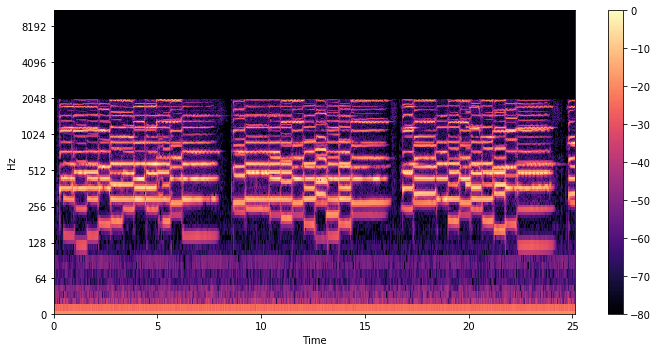

In [24]:
magnitude = np.zeros((927,2519))
magnitude[:172,:] = Vft[:172,:2519]
plt.figure(figsize=(10,5))
librosa.display.specshow(librosa.amplitude_to_db(magnitude,ref=np.max), 
                         x_axis='time', y_axis='log', 
                        sr=sample_rate, hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

In [25]:
x = librosa.istft(magnitude*phase, win_length = int(window_size), hop_length=hop_size)
IPython.display.Audio(data = x, rate = sample_rate)

In [29]:
# zero padding
Vft_s = np.load('/Users/apple/Downloads/store/Vft_s_7.npy')
print(phase.shape)
magnitude = np.zeros((927,2519))
magnitude[:172,:] = Vft_s[0,:,:]
x = librosa.istft(magnitude*phase, win_length = int(window_size), hop_length=hop_size)
IPython.display.Audio(data = x, rate = sample_rate)

(927, 2519)


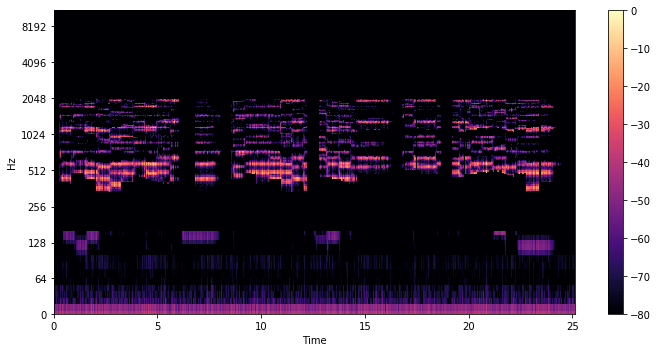

In [30]:
#Stft = librosa.stft(x, n_fft = window_size, hop_length=hop_size)
#magnitude, phase = librosa.magphase(Stft)
# Plot
plt.figure(figsize=(10,5))
librosa.display.specshow(librosa.amplitude_to_db(magnitude,ref=np.max), 
                         x_axis='time', y_axis='log', sr=sample_rate, hop_length=hop_size)
plt.colorbar()
plt.tight_layout()